In [1]:
import pandas as pd
import h5py


In [2]:
filename = "/Users/wanne/hdf5/bands/20231123-103807.hdf5"

with h5py.File(filename, 'r') as f:
    eeg_bands = f['eeg/bands/table'][:]

    

In [3]:
# inspecting structure/hierarchy 
with h5py.File(filename, 'r') as f:
    def print_structure(name, obj):
        print(name)
    f.visititems(print_structure)


eeg
eeg/bands
eeg/bands/_i_table
eeg/bands/_i_table/index
eeg/bands/_i_table/index/abounds
eeg/bands/_i_table/index/bounds
eeg/bands/_i_table/index/indices
eeg/bands/_i_table/index/indicesLR
eeg/bands/_i_table/index/mbounds
eeg/bands/_i_table/index/mranges
eeg/bands/_i_table/index/ranges
eeg/bands/_i_table/index/sorted
eeg/bands/_i_table/index/sortedLR
eeg/bands/_i_table/index/zbounds
eeg/bands/table


In [4]:
# check data type
print(type(eeg_bands))
print(eeg_bands.dtype)


<class 'numpy.ndarray'>
[('index', '<i8'), ('values_block_0', '<f8', (130,))]


In [5]:
index_bands = eeg_bands['index']
values_bands = eeg_bands['values_block_0']
df_bands = pd.DataFrame(values_bands, index=index_bands)
df_bands['average_alpha'] = df_bands.mean(axis=1)

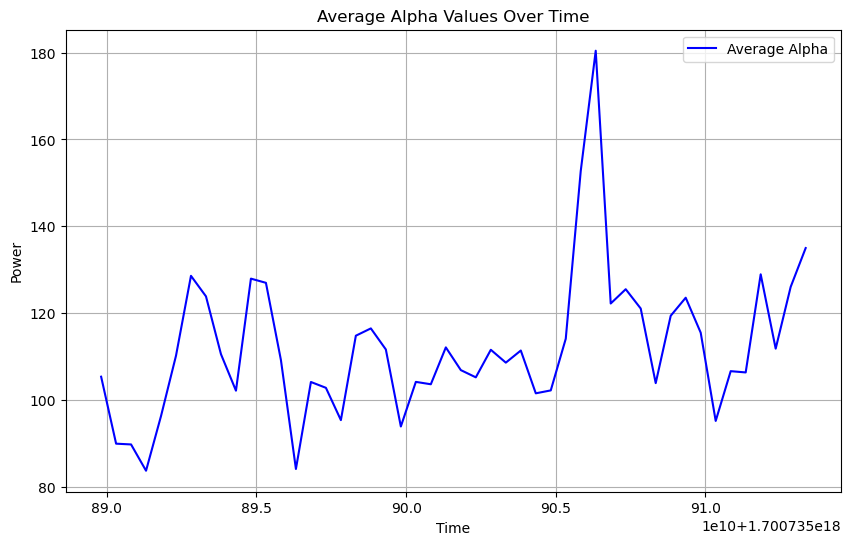

In [6]:
import matplotlib.pyplot as plt

# Create a plot for the average alpha values
plt.figure(figsize=(10, 6))
plt.plot(df_bands.index, df_bands['average_alpha'], label='Average Alpha', color='blue')
plt.title('Average Alpha Values Over Time')
plt.xlabel('Time')
plt.ylabel('Power')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()

In [7]:
# converting structured numpy array into pandas DataFrame 
# Extracting the index and values fields
index_data = eeg_bands['index']
values_data = eeg_bands['values_block_0']

# Constructing the DataFrame
df = pd.DataFrame(values_data, index=index_data)

# Renaming the columns for clarity
column_names = [f"Channel_{i+1}" for i in range(values_data.shape[1])]
df.columns = column_names

# Display the first few rows
print(df.head())


                     Channel_1  Channel_2  Channel_3  Channel_4  Channel_5  \
1700735889811633664  40.496422  19.666846  18.820950  25.448443  42.299088   
1700735890311837440  30.104742  16.386024  20.323556  20.376592  47.354957   
1700735890811893504  52.683475  24.853638  28.318174  19.736371  42.838900   
1700735891311815680  48.890855  26.067416  27.232949  19.429249  29.665017   
1700735891812750848  46.793909  26.364863  23.628056  15.068280  23.639497   

                      Channel_6  Channel_7  Channel_8  Channel_9  Channel_10  \
1700735889811633664  228.802374  13.808198  10.666239  10.624894   12.159035   
1700735890311837440   40.525219  14.028607  13.397251  13.720644   16.005604   
1700735890811893504  328.348421  15.503071  14.078553  14.482957   15.302951   
1700735891311815680  328.208653  12.285605  13.366733  13.791770   15.707778   
1700735891812750848  277.025504  16.335820  16.803293  15.777947   18.510507   

                     ...  Channel_121  Channel_122

In [8]:
# Find the overall channel with the highest average alpha power
mean_alpha_power = df.mean()
channel_highest_alpha = mean_alpha_power.idxmax()

print(f"Channel with the highest average alpha power: {channel_highest_alpha}")


Channel with the highest average alpha power: Channel_95


In [9]:
highest_alpha_channels = df.idxmax(axis=1)

# Use value_counts() to count occurrences of each channel
channel_counts = highest_alpha_channels.value_counts()

# Find the channel with the highest count (most frequent)
most_frequent_channel = channel_counts.idxmax()

print(f"The most frequent channel with the highest alpha power is: {most_frequent_channel}")


The most frequent channel with the highest alpha power is: Channel_95


In [10]:
# Calculate the absolute difference for each channel between consecutive rows
differences = df.diff().abs()

# Sum the differences for each channel
cumulative_difference = differences.sum()

# Find the channel with the most variation
channel_most_variation = cumulative_difference.idxmax()

print(f"The channel with the biggest changes in alpha value is: {channel_most_variation}")


The channel with the biggest changes in alpha value is: Channel_95


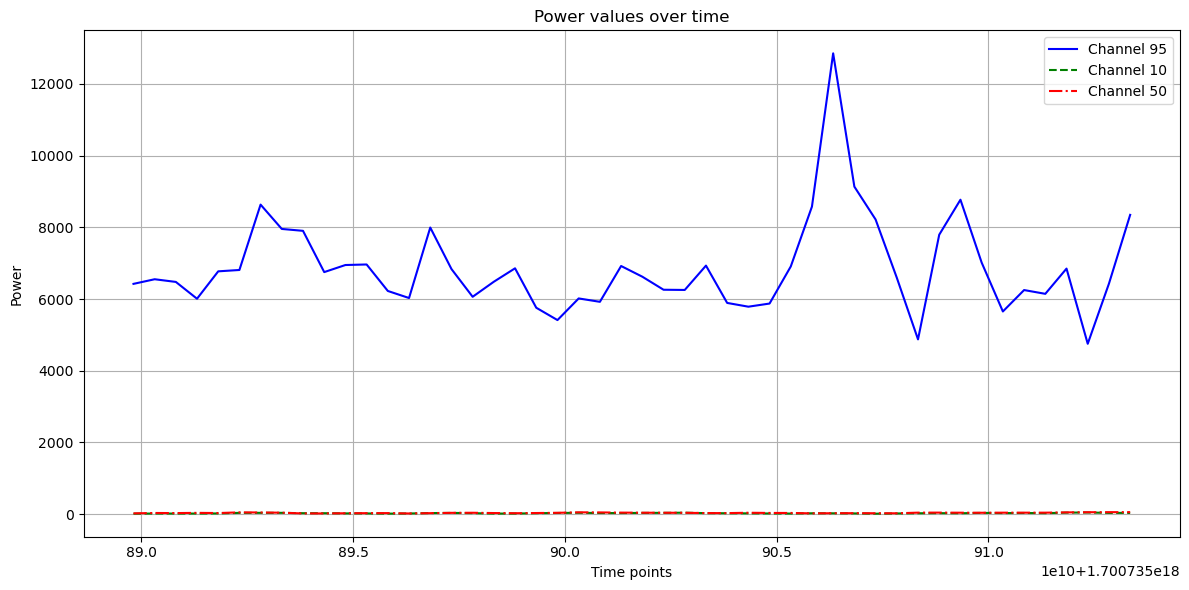

In [11]:
import matplotlib.pyplot as plt

# Extract the power values for the channels
channel_95_values = df['Channel_95']
channel_10_values = df['Channel_10']
channel_50_values = df['Channel_50']

# Plotting the values with specified colors
plt.figure(figsize=(12, 6))
plt.plot(channel_95_values, color='blue', label='Channel 95')
plt.plot(channel_10_values, color='green', linestyle='--', label='Channel 10')
plt.plot(channel_50_values, color='red', linestyle='-.', label='Channel 50')
plt.title('Power values over time')
plt.xlabel('Time points')
plt.ylabel('Power')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [12]:
# converting the index of the DataFrame df to floating-point numbers
index_series = pd.Series(df.index.astype(float))

# identifying and removing outliers from a dataset
# calculates the quartiles and IQR of the index values in your DataFrame
# filters the DataFrame to retain only the rows where the index values fall within a specified range
Q1 = index_series.quantile(0.25)
Q3 = index_series.quantile(0.75)
IQR = Q3 - Q1

filtered_df = df[(df.index.astype(float) >= (Q1 - 1.5 * IQR)) & (df.index.astype(float) <= (Q3 + 1.5 * IQR))]


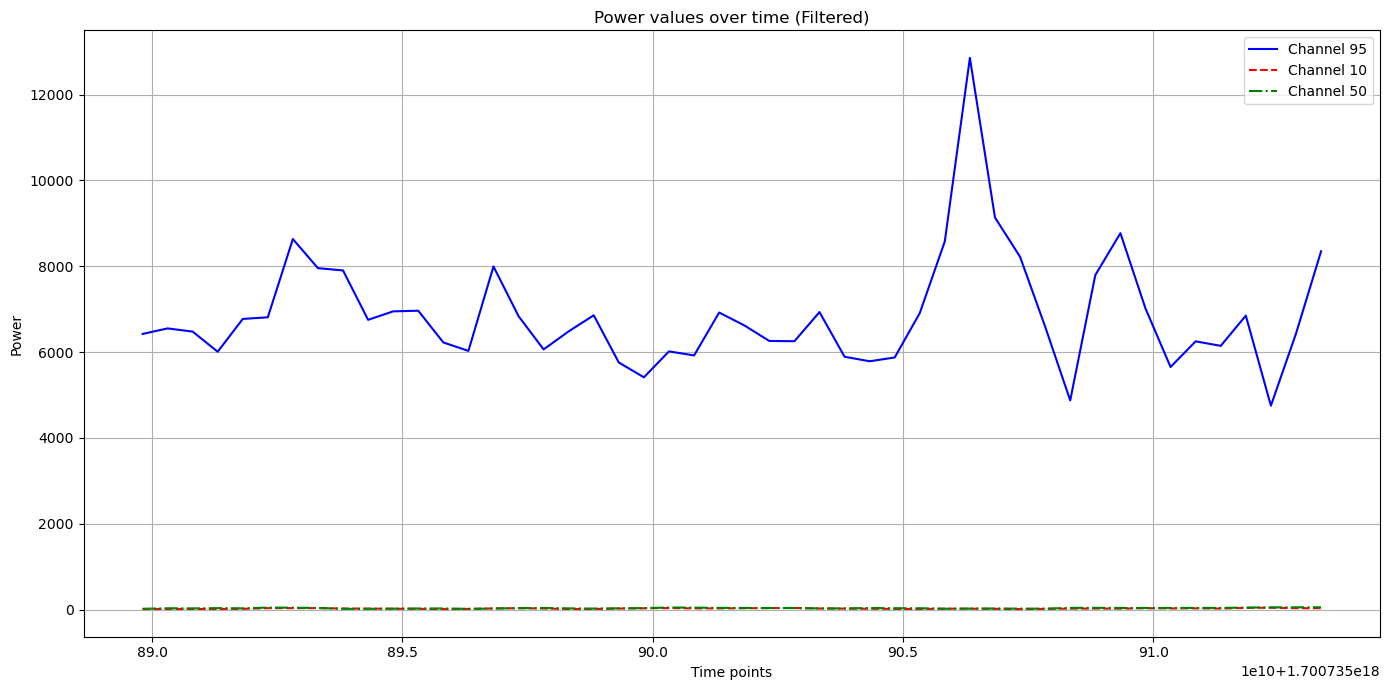

In [13]:
# filtered plotting 

plt.figure(figsize=(14, 7))

# Plotting the values for each channel
plt.plot(filtered_df['Channel_95'], label='Channel 95', color='blue')
plt.plot(filtered_df['Channel_10'], label='Channel 10', linestyle='--', color='red')
plt.plot(filtered_df['Channel_50'], label='Channel 50', linestyle='-.', color='green')

# Setting the title and labels
plt.title('Power values over time (Filtered)')
plt.xlabel('Time points')
plt.ylabel('Power')
plt.legend()

# Displaying the plot
plt.grid(True)
plt.tight_layout()
plt.show()


In [14]:
# adapting x-axis 
# Convert the index to numeric
df.index = df.index.astype(int)

# Subtract the first timestamp to get elapsed time since start
df.index = df.index - df.index[0]

# Convert from nanoseconds to seconds
df.index = df.index / 1e9

print(df.head())


          Channel_1  Channel_2  Channel_3  Channel_4  Channel_5   Channel_6  \
0.000000  40.496422  19.666846  18.820950  25.448443  42.299088  228.802374   
0.500204  30.104742  16.386024  20.323556  20.376592  47.354957   40.525219   
1.000260  52.683475  24.853638  28.318174  19.736371  42.838900  328.348421   
1.500182  48.890855  26.067416  27.232949  19.429249  29.665017  328.208653   
2.001117  46.793909  26.364863  23.628056  15.068280  23.639497  277.025504   

          Channel_7  Channel_8  Channel_9  Channel_10  ...  Channel_121  \
0.000000  13.808198  10.666239  10.624894   12.159035  ...    35.571301   
0.500204  14.028607  13.397251  13.720644   16.005604  ...    21.871750   
1.000260  15.503071  14.078553  14.482957   15.302951  ...    21.899505   
1.500182  12.285605  13.366733  13.791770   15.707778  ...    19.722533   
2.001117  16.335820  16.803293  15.777947   18.510507  ...    28.802968   

          Channel_122  Channel_123  Channel_124  Channel_125  Channel_126 

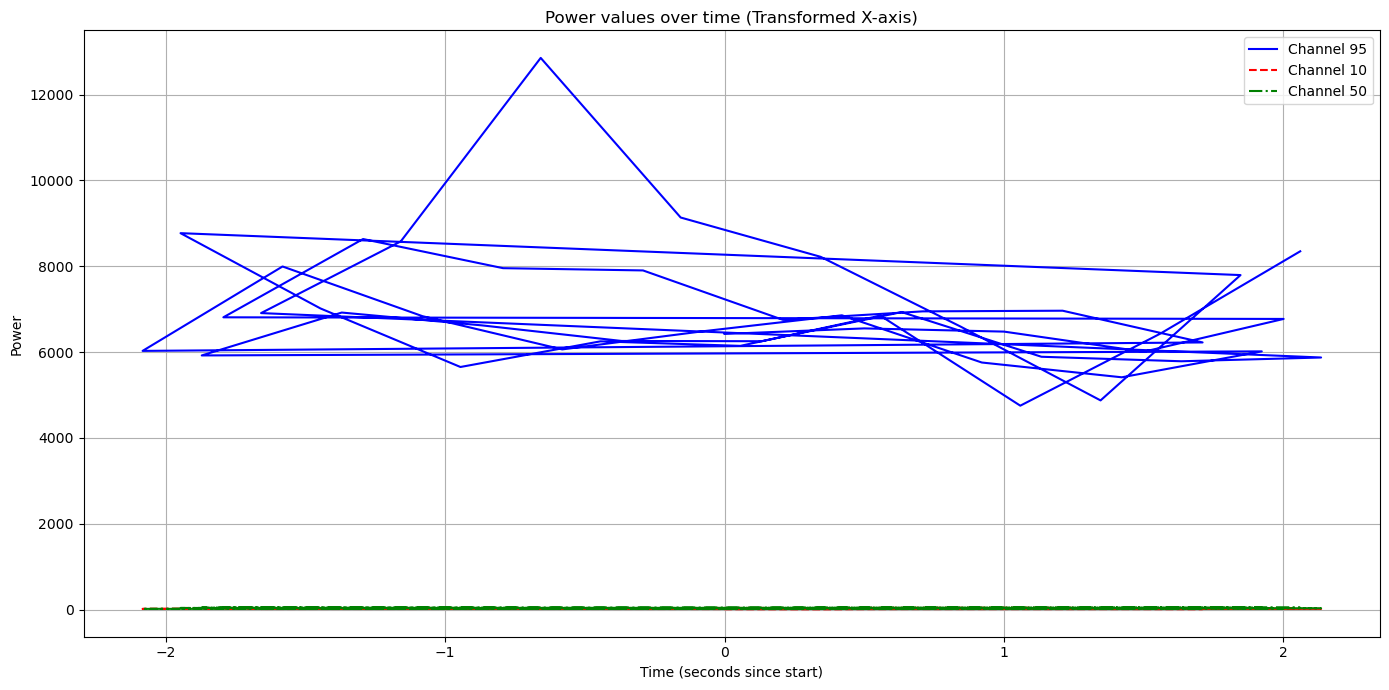

In [15]:
plt.figure(figsize=(14, 7))

# Plotting the values for each channel
plt.plot(df['Channel_95'], label='Channel 95', color='blue')
plt.plot(df['Channel_10'], label='Channel 10', linestyle='--', color='red')
plt.plot(df['Channel_50'], label='Channel 50', linestyle='-.', color='green')

# Setting the title and labels
plt.title('Power values over time (Transformed X-axis)')
plt.xlabel('Time (seconds since start)')
plt.ylabel('Power')
plt.legend()

# Displaying the plot
plt.grid(True)
plt.tight_layout()
plt.show()


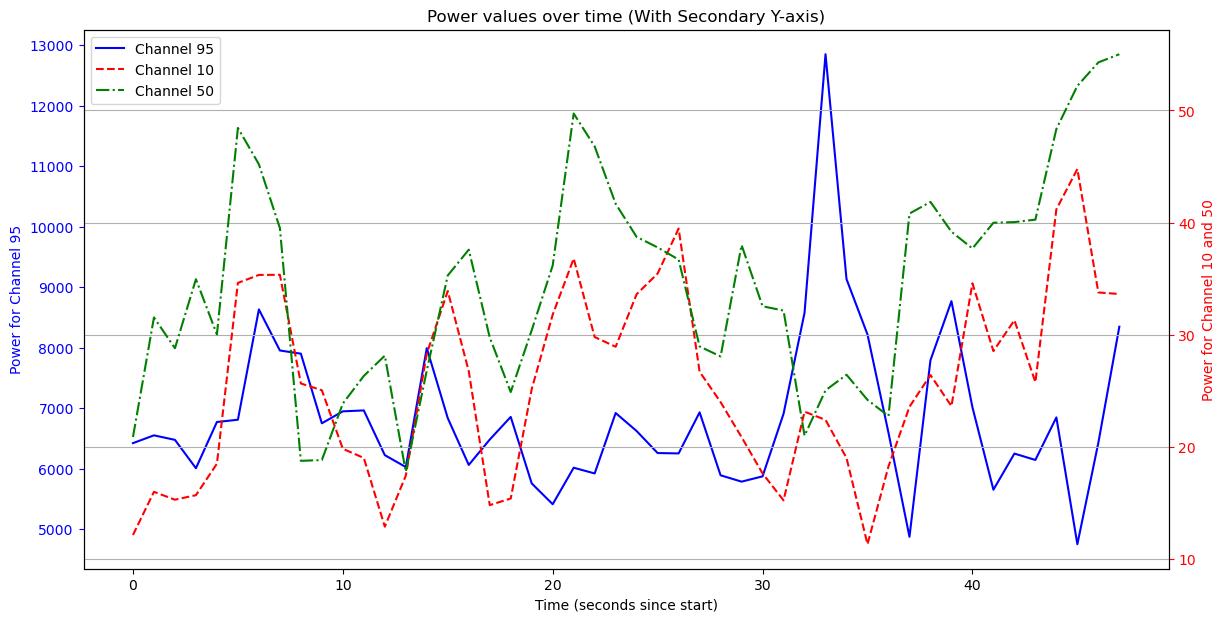

In [16]:
# plotting secondary y-axis 
import matplotlib.pyplot as plt

# Sample data
time = range(len(df))
channel_95 = df['Channel_95']
channel_10 = df['Channel_10']
channel_50 = df['Channel_50']

fig, ax1 = plt.subplots(figsize=(14,7))

# Plotting Channel 95 on the primary y-axis
ax1.plot(time, channel_95, color='blue', label='Channel 95')
ax1.set_ylabel('Power for Channel 95', color='blue')
ax1.tick_params('y', colors='blue')
ax1.set_xlabel('Time (seconds since start)')

# Using twinx() to create a secondary y-axis
ax2 = ax1.twinx()
ax2.plot(time, channel_10, color='red', linestyle='--', label='Channel 10')
ax2.plot(time, channel_50, color='green', linestyle='-.', label='Channel 50')
ax2.set_ylabel('Power for Channel 10 and 50', color='red')
ax2.tick_params('y', colors='red')

fig.legend(loc="upper left", bbox_to_anchor=(0,1), bbox_transform=ax1.transAxes)
plt.title('Power values over time (With Secondary Y-axis)')
plt.grid(True)
plt.show()


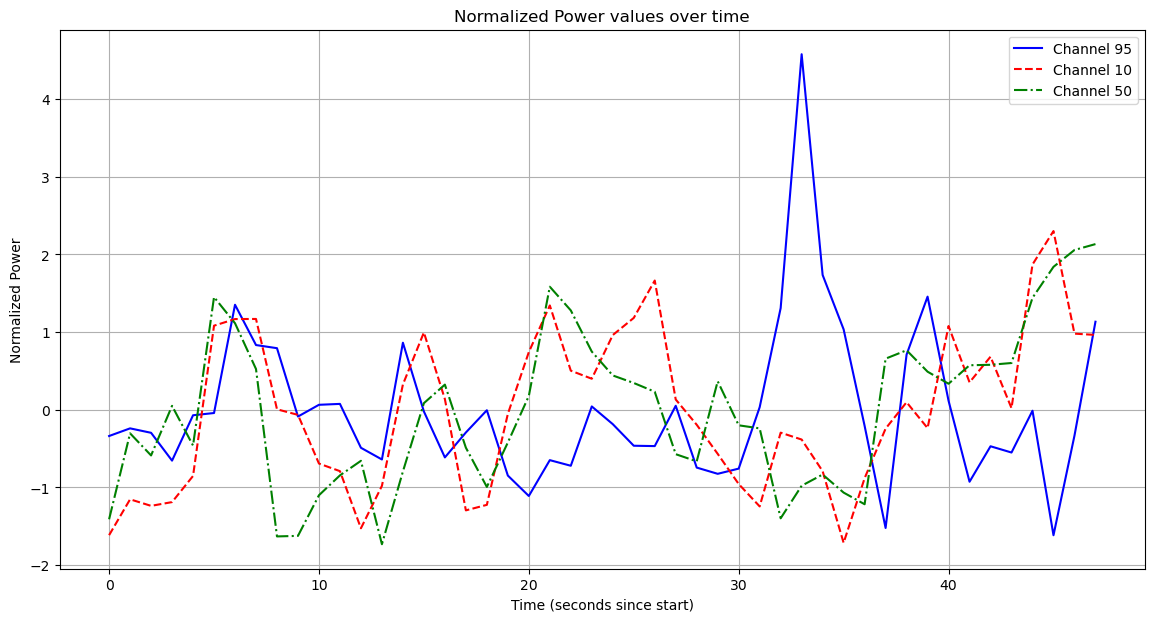

In [17]:
# normalizing data 
# Scale each channel's data to have a mean of zero and a standard deviation of one 
# No absolute values 

from sklearn.preprocessing import StandardScaler

# Normalizing the data
scaler = StandardScaler()
normalized_data = scaler.fit_transform(df[['Channel_95', 'Channel_10', 'Channel_50']])
df_normalized = pd.DataFrame(normalized_data, columns=['Channel_95', 'Channel_10', 'Channel_50'])

# Plotting
plt.figure(figsize=(14,7))
plt.plot(df_normalized['Channel_95'], color='blue', label='Channel 95')
plt.plot(df_normalized['Channel_10'], color='red', linestyle='--', label='Channel 10')
plt.plot(df_normalized['Channel_50'], color='green', linestyle='-.', label='Channel 50')
plt.title('Normalized Power values over time')
plt.xlabel('Time (seconds since start)')
plt.ylabel('Normalized Power')
plt.legend()
plt.grid(True)
plt.show()


In [18]:
import numpy as np

# normalizing each channel's data before computing variance
# -> comparing the relative changes in alpha power across channels, rather than absolute changes
# The normalization can be done by subtracting the mean and dividing by the standard deviation for each channel
# This will center the data around zero and scale it, making the variances of different channels more comparable.
# comparing the channels based on their patterns of variation in the alpha range rather than absolute power levels. 

# Normalize the data for each channel
normalized_data = {}
for column in df.columns:
    channel_data = df[column]
    normalized_data[column] = (channel_data - channel_data.mean()) / channel_data.std()

# Compute variance for each normalized channel and identify the one with the highest variance
channel_variances_normalized = {channel: np.var(normalized_data[channel]) for channel in normalized_data}
best_channel_normalized = max(channel_variances_normalized, key=channel_variances_normalized.get)

print("The channel best representing changes in alpha power after normalization is:", best_channel_normalized)


The channel best representing changes in alpha power after normalization is: Channel_88


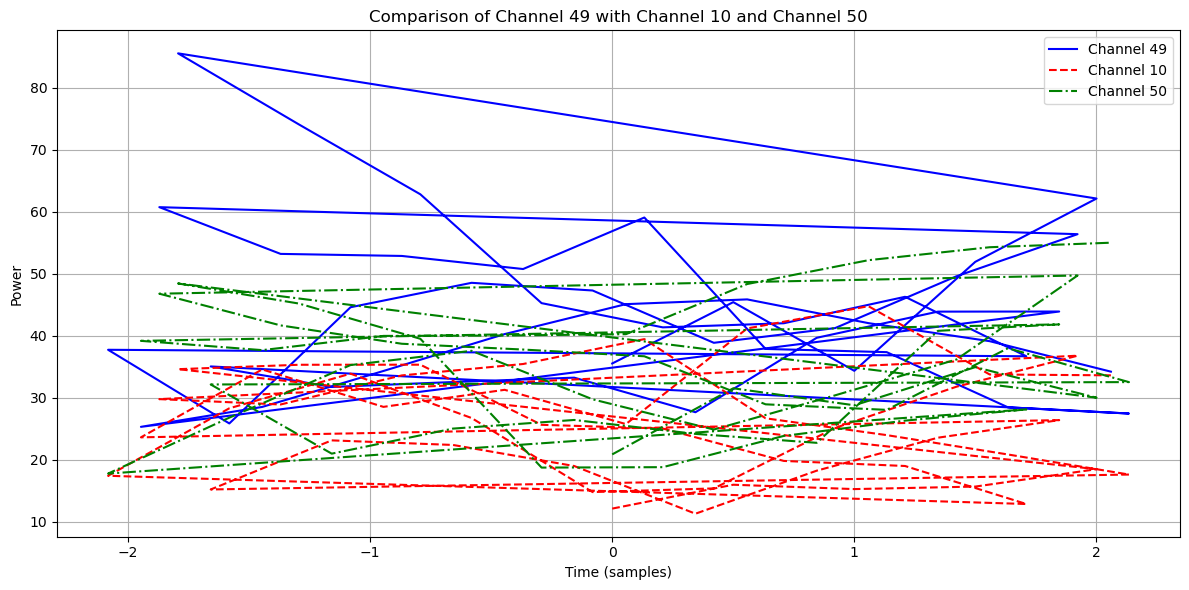

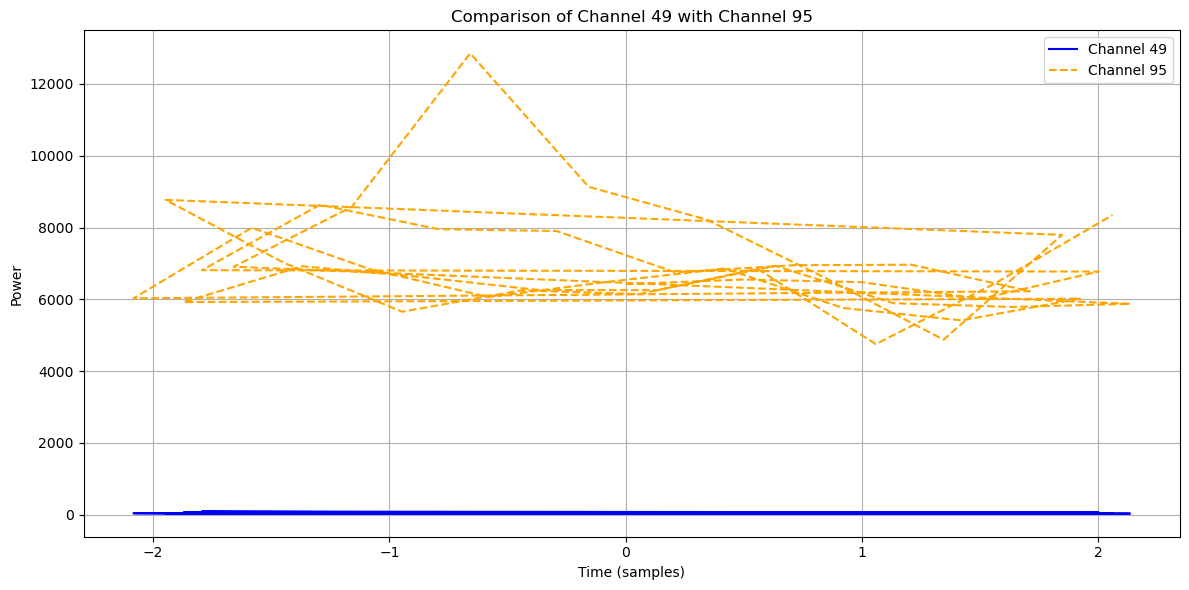

In [19]:
import matplotlib.pyplot as plt

# Extract data for the desired channels
channel_49_data = df['Channel_49']
channel_10_data = df['Channel_10']
channel_50_data = df['Channel_50']
channel_95_data = df['Channel_95']

# Plot comparison of Channel 49 with Channel 10 and Channel 50
plt.figure(figsize=(12, 6))
plt.plot(channel_49_data, label="Channel 49", color='blue')
plt.plot(channel_10_data, label="Channel 10", color='red', linestyle='--')
plt.plot(channel_50_data, label="Channel 50", color='green', linestyle='-.')
plt.title("Comparison of Channel 49 with Channel 10 and Channel 50")
plt.xlabel("Time (samples)")
plt.ylabel("Power")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot comparison of Channel 40 with Channel 95
plt.figure(figsize=(12, 6))
plt.plot(channel_49_data, label="Channel 49", color='blue')
plt.plot(channel_95_data, label="Channel 95", color='orange', linestyle='--')
plt.title("Comparison of Channel 49 with Channel 95")
plt.xlabel("Time (samples)")
plt.ylabel("Power")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
